# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

This notebook was generated by an AI and has not been fully verified. Users should be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains data from the Allen Institute Openscope - Sequence Learning Project. The project investigates predictive coding in the neocortex using two-photon calcium imaging in head-fixed mice viewing sequences of natural movie clips. The dataset includes calcium imaging data from excitatory neurons in layers 2/3 and 4 of multiple cortical areas (V1, LM, AM, and PM), as well as behavioral data (running wheel).

Dandiset Link: https://dandiarchive.org/dandiset/000617/0.250312.0130

## What this notebook covers

This notebook will demonstrate how to:

1. Load the Dandiset using the DANDI API.
2. List the assets within the Dandiset.
3. Load a specific NWB file from the Dandiset.
4. Explore the structure and contents of the NWB file.
5. Visualize some of the data, including running speed and neuronal activity (dF/F traces and event detection).
6. Visualize the image mask for a selected ROI.

## Required Packages

This notebook requires the following packages:

- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas
- itertools
- seaborn

## Loading the Dandiset

We will connect to the DANDI archive and load the specified Dandiset using the `dandiapi` client.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for better visualizations
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130

First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (ID: c407d5e4-9431-4f94-b5d0-2b28069fa244)


## Loading an NWB File

We will now load a specific NWB file from the Dandiset. We'll load the file located at `sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb` with asset ID `27dd7936-b3e7-45af-aca0-dc98b5954d19`.

The URL for this asset is: https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/

We will use the `remfile` and `h5py` libraries to load the file remotely and then `pynwb` to read the NWB structure.

In [2]:
# Load a specific NWB file
url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject genotype: {nwb.subject.genotype}")
print(f"Imaging location: {nwb.imaging_planes['imaging_plane_1'].location}")

NWB file identifier: 1280384858
Session description: Ophys Session
Subject ID: 677038
Subject genotype: Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt
Imaging location: VISp


## NWB File Contents Summary

This NWB file contains various types of neurophysiology data, primarily focusing on two-photon calcium imaging and behavioral recordings. Here's a summary of the key data interfaces available:

*   **Acquisition:**
   *   `v_in`: Theoretical maximum voltage for the running wheel encoder.
   *   `v_sig`: Voltage signal from the running wheel encoder.
*   **Stimulus Template:**
   *   `gray`, `movie_clip_A`, `movie_clip_B`, `movie_clip_C`: Templates for the visual stimuli presented during the experiment.
*   **Processing Modules:**
   *   **`ophys` (Optical Physiology):**
       *   `corrected_fluorescence`: Corrected fluorescence traces for segmented ROIs.
       *   `dff`: dF/F traces for segmented ROIs.
       *   `event_detection`: Detected calcium events for segmented ROIs.
       *   `image_segmentation`: Information about segmented ROIs, including masks and spatial coordinates.
           *   `cell_specimen_table`: Details about each segmented ROI, including `cell_specimen_id`, spatial properties (`x`, `y`, `width`, `height`, `image_mask`), and validity.
       *   `images`: Contains images like `average_image`, `max_projection`, and `segmentation_mask_image`.
       *   `neuropil_trace`: Neuropil fluorescence traces.
       *   `ophys_motion_correction_x`, `ophys_motion_correction_y`: Motion correction data in x and y directions.
   *   **`running`:**
       *   `dx`: Running wheel angular change.
       *   `speed`: Filtered running speed.
       *   `speed_unfiltered`: Unfiltered running speed.
   *   **`stimulus`, `stimulus_ophys`:**
       *   `timestamps`: Timestamps related to stimulus presentations.
*   **Intervals:**
   *   `gray_presentations`, `movie_clip_A_presentations`, `movie_clip_B_presentations`, `movie_clip_C_presentations`: Time intervals and details for each stimulus presentation.

For external exploration of this NWB file on Neurosift:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=draft

## Visualizing Data

We will now load and visualize some of the data from the NWB file.

### Running Speed

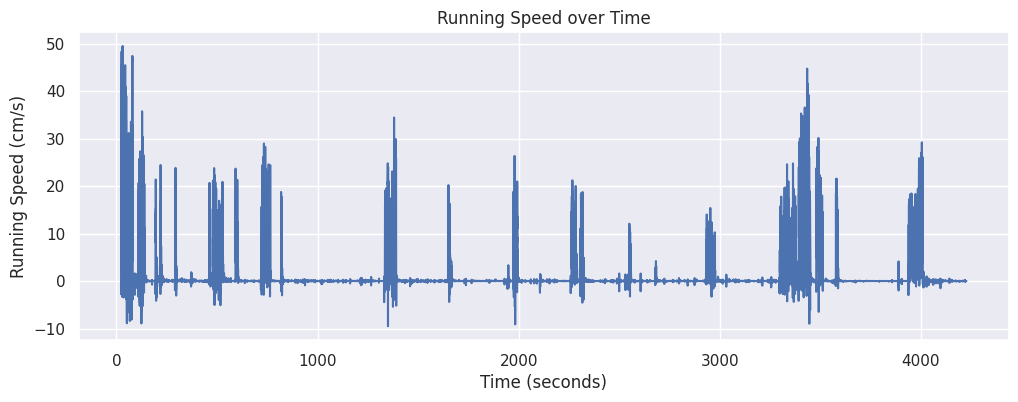

In [3]:
# Get running speed data
running_speed = nwb.processing['running']['speed']
speed_data = running_speed.data[:]
speed_timestamps = running_speed.timestamps[:]

# Plot running speed
plt.figure(figsize=(12, 4))
plt.plot(speed_timestamps, speed_data)
plt.xlabel(f"Time ({running_speed.timestamps_unit})")
plt.ylabel(f"Running Speed ({running_speed.unit})")
plt.title("Running Speed over Time")
plt.grid(True)
plt.show()

### Corrected Fluorescence Traces

Let's visualize the corrected fluorescence traces for a few example ROIs. We will select the first 10 ROIs for this visualization.

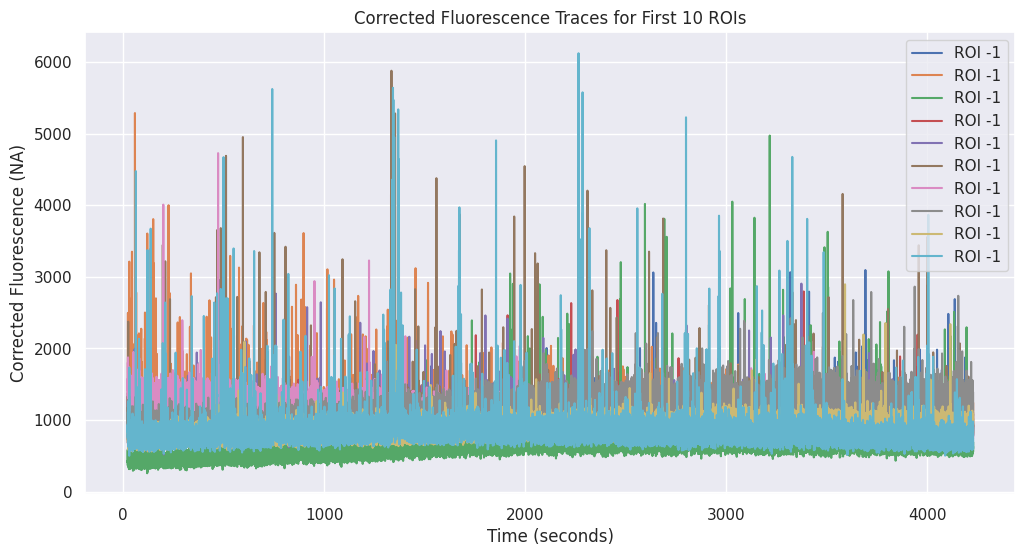

In [4]:
# Get corrected fluorescence traces
corrected_fluorescence_traces = nwb.processing['ophys']['corrected_fluorescence'].roi_response_series['traces']
traces_data = corrected_fluorescence_traces.data[:, :10] # Load data for the first 10 ROIs
traces_timestamps = corrected_fluorescence_traces.timestamps[:]

# Get ROI information
roi_table = nwb.processing['ophys']['image_segmentation'].plane_segmentations['cell_specimen_table'].to_dataframe()
roi_ids = roi_table['cell_specimen_id'].iloc[:10].values # Get IDs for the first 10 ROIs

# Plot corrected fluorescence traces for the first 10 ROIs
plt.figure(figsize=(12, 6))
for i in range(traces_data.shape[1]):
    plt.plot(traces_timestamps, traces_data[:, i], label=f'ROI {roi_ids[i]}')
plt.xlabel(f"Time ({corrected_fluorescence_traces.timestamps_unit})")
plt.ylabel(f"Corrected Fluorescence ({corrected_fluorescence_traces.unit})")
plt.title("Corrected Fluorescence Traces for First 10 ROIs")
plt.legend()
plt.grid(True)
plt.show()

### dF/F Traces

Now let's visualize the dF/F traces for the same first 10 example ROIs.

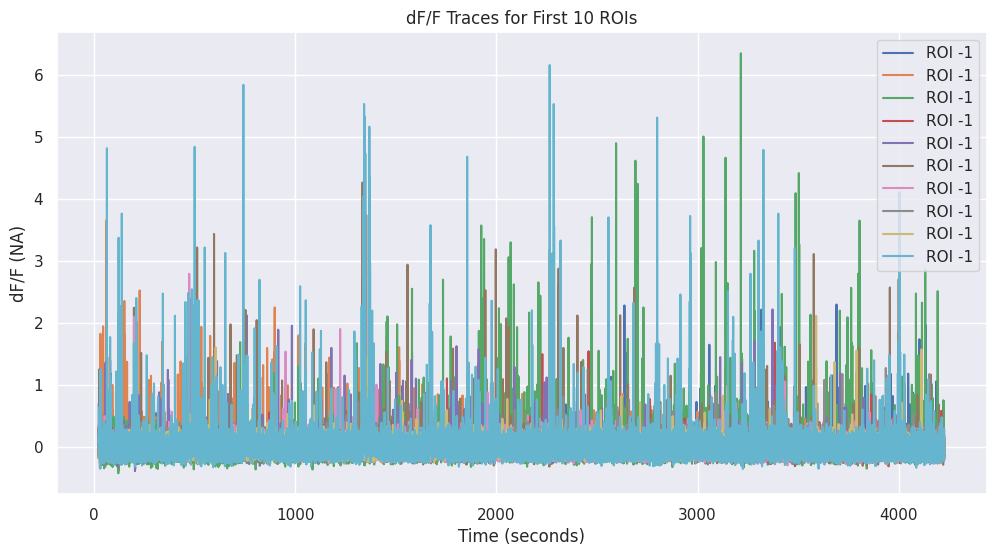

In [5]:
# Get dF/F traces
dff_traces = nwb.processing['ophys']['dff'].roi_response_series['traces']
dff_data = dff_traces.data[:, :10] # Load data for the first 10 ROIs
dff_timestamps = dff_traces.timestamps[:]

# Plot dF/F traces for the first 10 ROIs
plt.figure(figsize=(12, 6))
for i in range(dff_data.shape[1]):
    plt.plot(dff_timestamps, dff_data[:, i], label=f'ROI {roi_ids[i]}')
plt.xlabel(f"Time ({dff_traces.timestamps_unit})")
plt.ylabel(f"dF/F ({dff_traces.unit})")
plt.title("dF/F Traces for First 10 ROIs")
plt.legend()
plt.grid(True)
plt.show()

### Event Detection Data

Let's examine the event detection data, which indicates detected calcium events for each ROI. We will visualize the event data for the first 10 ROIs.

AttributeError: 'numpy.ndarray' object has no attribute 'timestamps_unit'

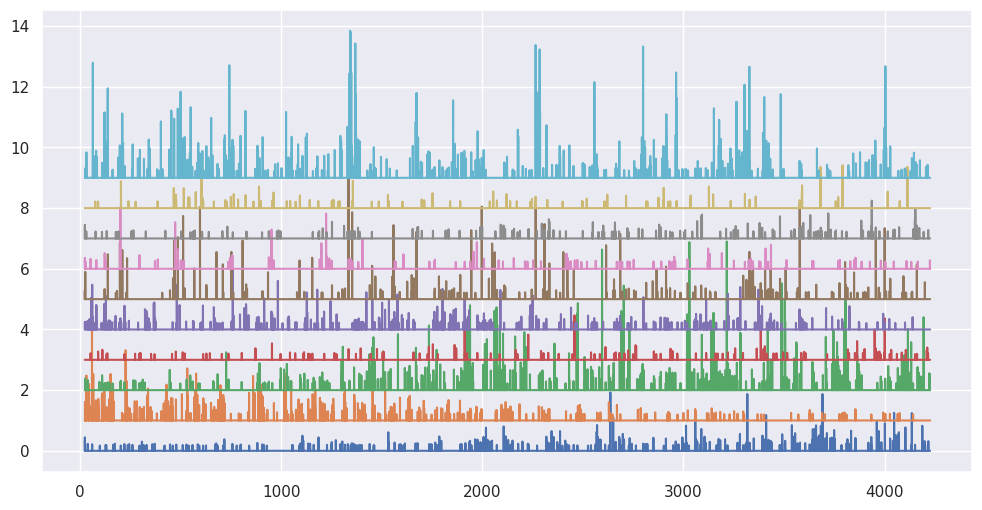

In [6]:
# Get event detection data
event_detection_data = nwb.processing['ophys']['event_detection'].data[:, :10]
event_timestamps = nwb.processing['ophys']['event_detection'].timestamps[:]

# Plot event detection data for the first 10 ROIs
plt.figure(figsize=(12, 6))
for i in range(event_detection_data.shape[1]):
    plt.plot(event_timestamps, event_detection_data[:, i] + i, label=f'ROI {roi_ids[i]}') # Offset traces for visibility
plt.xlabel(f"Time ({event_detection_data.timestamps_unit})")
plt.ylabel("ROI Index (offset for visibility)")
plt.title("Event Detection Data for First 10 ROIs")
# We don't need a legend here as the y-axis represents the ROI index
# plt.legend()
plt.grid(True)
plt.show()

### Image Mask for an Example ROI

We can also visualize the spatial footprint of a segmented ROI using its image mask. Let's visualize the mask for the first ROI.

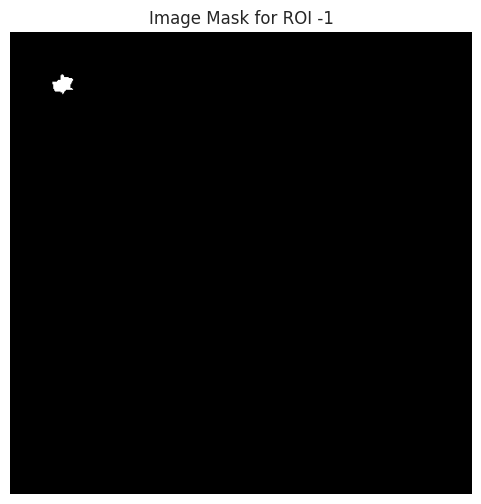

In [7]:
# Get ROI table to access image masks
roi_table = nwb.processing['ophys']['image_segmentation'].plane_segmentations['cell_specimen_table'].to_dataframe()

# Get the image mask for the first ROI
image_mask = roi_table['image_mask'].iloc[0]

# Visualize the image mask
plt.figure(figsize=(6, 6))
plt.imshow(image_mask, cmap='gray')
plt.title(f'Image Mask for ROI {roi_ids[0]}')
plt.axis('off')
plt.show()

### Visualizing Multiple ROI Masks

We can also visualize the masks of multiple ROIs simultaneously. To avoid overlap obscuring individual masks, we can use a heatmap of the maximum intensity across the selected masks.

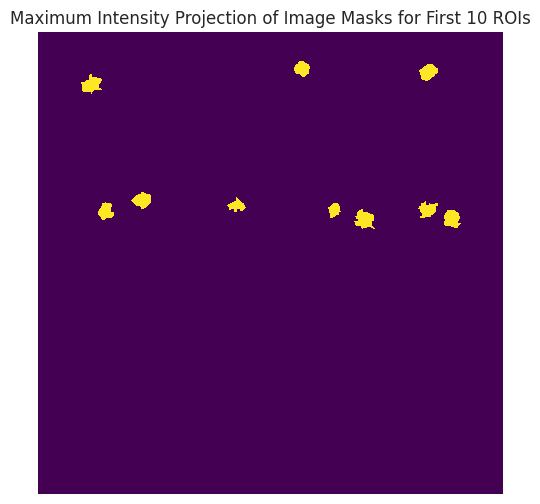

In [8]:
# Get image masks for the first 10 ROIs
image_masks = roi_table['image_mask'].iloc[:10].values

# Stack the masks and get the maximum intensity for visualization
stacked_masks = np.stack(image_masks, axis=0)
max_intensity_projection = np.max(stacked_masks, axis=0)

# Visualize the combined masks as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(max_intensity_projection, cmap='viridis', cbar=False)
plt.title('Maximum Intensity Projection of Image Masks for First 10 ROIs')
plt.axis('off')
plt.show()

## Summary and Future Directions

This notebook provided a basic introduction to accessing and visualizing data from Dandiset 000617. We loaded the Dandiset, explored its contents, loaded a specific NWB file, and visualized running speed, corrected fluorescence traces, dF/F traces, event detection data, and ROI image masks.

Future analysis could involve:

*   Aligning calcium imaging data with visual stimulus presentations to analyze neuronal responses to different movie clips.
*   Investigating the relationship between running behavior and neuronal activity.
*   Performing more advanced analysis on the calcium imaging data, such as analyzing event properties or correlating activity across different ROIs.
*   Comparing data across different subjects or experimental sessions within the Dandiset.
*   Developing more sophisticated visualizations to explore the data.